In [ ]:

# https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1

# Obj: minimize squared loss 
# ie.. argmin sum of [(actual yi- predicted yi)^2] from i = 1 to k  --> mini batch GD
# ie.. argmin sum of [(actual yi- predicted yi)^2] from i = 1 to n -->GD

In [2]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import sklearn.datasets

In [ ]:
# prediction = np.dot(w,x[i]) + b  - calc predicted value: w^T.x + b
# since we are implementing SGD, 
# we will be performing this over a random sample of BATCH SIZE “ k”, where k < n
# k_tr_data = tr_data.sample(k)
# loss fn l = sum[(y[i] - w^T.x[i]+b)^2]

In [ ]:
# update fn : w[j+1] = w[j]-r*[d/dw(loss l)]
# ie.. w[j+1] = w[j]-r.[-2x[i][y[i]-w^T.x[i]+b]]
# for i in range(n):
# w_grad = w_grad + (-2x[i])*[y[i]-prediction]
# update fn wrt x : w = w- learning rate*w_grad
# update fn wrt b : b_grad = b_grad + (-2) * y[i]-prediction
# update fn wrt b : b = b - learning_rate*b_grad

In [5]:
w=np.zeros(12)
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Custom SGD

In [ ]:

def MyCustomSGD(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction = np.dot(w,x[i])+b
            w_gradient += (-2)*x[i]*(y[i]-(prediction))
            b_gradient += (-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias


# Linear Regression on Boston Housing data

With Scikit Learn’s SGDRegressor

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
print("DONE")

DONE


Data Loading, Splitting and Standardizing :

In [ ]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

## Adding the PRIZE Column in the data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
print(train_data.head(3))

x_test=np.array(x_test)
y_test=np.array(y_test)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)
          0         1         2        3         4         5         6  \
0 -0.237306 -0.467774  1.191996 -0.26968  2.623572 -0.233756  1.006225   
1 -0.119064 -0.467774  1.191996 -0.26968  2.623572 -1.454741  0.888348   
2 -0.162709 -0.467774  1.191996 -0.26968  2.623572 -0.943364  1.102670   

          7         8         9        10        11        12  price  
0 -1.021808 -0.546891 -0.069321 -1.744194  0.163063  0.173636   21.5  
1 -0.965881 -0.546891 -0.069321 -1.744194 -3.106325  0.461392   13.1  
2 -1.069705 -0.546891 -0.069321 -1.744194 -2.178559  0.533331   15.6  


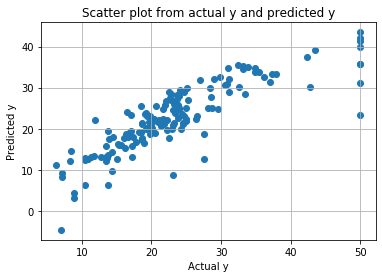

Mean Squared Error : 26.344468819678063


In [ ]:

# SkLearn SGD classifier
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))
#print('w =' clf_.coef_)

Linear Regression with our Custom SGD:

In [ ]:

def MyCustomSGD(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias


In [ ]:

def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)



Now lets run our Custom SGD with the following parameters
Learning rate = 1
Batch Size K=10
Divide the Learning rate by = 2


w = [[  -6.54575521  -24.45234755  -47.88823256   89.40932094    3.23312818
    68.02719463   -2.46787419   36.98062571    5.97905047    1.61521476
   -45.56274942 -125.38136594  -51.47691329]]
b = [75.2696768]


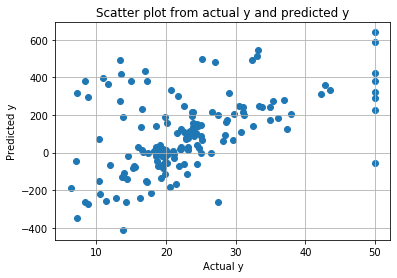

Mean Squared Error : 44113.913650213595


In [ ]:

w,b=MyCustomSGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
print('w =',w)
print('b =',b)
y_pred_customsgd=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))


Improve CustomSGD Result by changing the parameters as:
Learning rate = 0.001
Iterations = 1000
Divide the Learning rate by = 1 (ie. Not Dividing :-P)

w = [[-0.57278657  0.35720348 -0.61661574  0.82683558 -0.46111323  3.06376096
  -0.11445157 -1.25539526  0.37297132 -0.34798025 -1.58042974  1.03561239
  -2.76119765]]
b = [19.20819357]


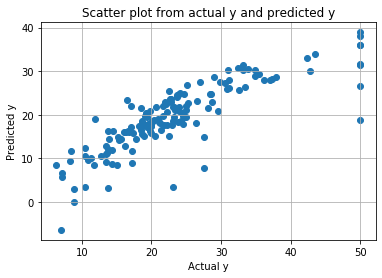

Mean Squared Error : 42.60143703882564


In [ ]:

w,b=MyCustomSGD(train_data,learning_rate=0.001,n_iter=1000,divideby=1,k=10)
y_pred_customsgd_improved=predict(x_test,w,b)
print('w =',w)
print('b =',b)
plt.scatter(y_test,y_pred_customsgd_improved)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))
